<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Re-inforcement-Learning/blob/main/2348505_Lab7(RL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [22]:
import matplotlib.pyplot as plt
import numpy as np

### **Step 1: Define the Grid-World Environment**

We start by defining a simple grid-world where the agent interacts. This includes the states, rewards, and transition dynamics.

- The GridWorld class represents a 4x4 grid.
- The reset() method initializes the agent at the starting position.
- The step() method takes an action (up, down, left, or right), updates the agent’s position, returns the next state, the reward, and whether the goal has been reached.

In [23]:
class GridWorld:
    def __init__(self, size=(4, 4)):
        self.size = size
        self.goal_state = (3, 3)
        self.start_state = (0, 0)
        self.current_state = self.start_state

    def reset(self):
        """Reset the environment to the initial state."""
        self.current_state = self.start_state
        return self.current_state

    def step(self, action):
        """Take an action and return the next state, reward, and done flag."""
        x, y = self.current_state

        if action == 0:
            x = max(x - 1, 0)
        elif action == 1:
            x = min(x + 1, self.size[0] - 1)
        elif action == 2:
            y = max(y - 1, 0)
        elif action == 3:
            y = min(y + 1, self.size[1] - 1)

        next_state = (x, y)
        reward = -1
        done = False

        if next_state == self.goal_state:
            reward = 1
            done = True

        self.current_state = next_state
        return next_state, reward, done

    def visualize(self, agent_path=None, title="Grid World"):
        """Visualize the grid world with the agent's path and goal state."""
        grid = np.zeros(self.size)
        goal_x, goal_y = self.goal_state
        grid[goal_x, goal_y] = 1

        fig, ax = plt.subplots(figsize=(6, 6))
        ax.imshow(grid, cmap='Blues', origin='upper', extent=(0, self.size[1], 0, self.size[0]))

        ax.set_xticks(np.arange(0, self.size[1] + 1, 1))
        ax.set_yticks(np.arange(0, self.size[0] + 1, 1))
        ax.grid(True, which='both', color='black', linewidth=1)

        if agent_path:
            for state in agent_path:
                ax.plot(state[1] + 0.5, state[0] + 0.5, 'ro')

        ax.plot(goal_y + 0.5, goal_x + 0.5, 'go', markersize=10)

        plt.gca().invert_yaxis()
        plt.title(title)
        plt.show()

### **Step 2: Temporal Difference (TD) Learning with Bootstrapping**

Now we’ll implement a simple TD(0) learning algorithm to update the state-value function (V(s)) using bootstrapping. TD learning updates its estimates of the value of a state by combining sampled rewards with the current estimate of future values.


- Agent Class: Represents the agent that interacts with the environment
 - choose_action(): Chooses an action randomly.
 - update_value(): The core of the TD(0) update, where we compute the Temporal Difference error (td_error) and update the state-value V(s).
 - learn(): Runs the agent through a number of episodes to learn the state-value function using TD(0).

- In the update_value() function:

 - The TD target combines the reward obtained from the environment (reward) with the estimated value of the next state (V(next_state)).
 - The TD error is the difference between the TD target and the current estimate of the state value (V(state)).
 - We then adjust the value estimate by the learning rate (alpha).

In [24]:
class Agent:
    def __init__(self, grid_world, alpha=0.1, gamma=0.9):
        self.grid_world = grid_world
        self.alpha = alpha
        self.gamma = gamma
        self.V = np.zeros(grid_world.size)
        self.actions = [0, 1, 2, 3]
        self.action_counts = np.zeros(len(self.actions))
        self.total_rewards = []

    def choose_action(self, state):
        """Random action selection for simplicity."""
        action = np.random.choice(self.actions)
        self.action_counts[action] += 1
        return action

    def update_value(self, state, reward, next_state):
        """Update state-value function using TD(0) formula."""
        current_value = self.V[state]
        next_value = self.V[next_state]
        td_target = reward + self.gamma * next_value
        td_error = td_target - current_value
        self.V[state] += self.alpha * td_error
    def learn(self, episodes=100):
        """Train the agent by running through episodes."""
        for episode in range(episodes):
            state = self.grid_world.reset()
            agent_path = [state]
            total_reward = 0
            done = False

            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.grid_world.step(action)
                self.update_value(state, reward, next_state)
                agent_path.append(next_state)
                total_reward += reward
                state = next_state

            self.total_rewards.append(total_reward)

            if episode % 10 == 0:
                self.grid_world.visualize(agent_path, title=f"Episode {episode}")

            if episode % 10 == 0:
                print(f"State-values after episode {episode}:\n{self.V}")

            if episode % 10 == 0:
                plot_value_function(self.V, episode)

    def plot_learning_curve(self):
        """Plot the learning curve showing total reward per episode."""
        plt.plot(self.total_rewards)
        plt.title("Learning Curve: Total Reward per Episode")
        plt.xlabel("Episode")
        plt.ylabel("Total Reward")
        plt.show()

    def plot_action_distribution(self):
        """Plot the distribution of actions taken by the agent."""
        plt.bar(range(len(self.actions)), self.action_counts)
        plt.title("Action Distribution")
        plt.xlabel("Action")
        plt.ylabel("Frequency")
        plt.xticks(range(len(self.actions)), ["Up", "Down", "Left", "Right"])
        plt.show()

### **Step 3: Training and Observing Bootstrapping in Action**

Now we can run the agent in the grid-world environment and observe how it learns. In each episode, the agent will try to reach the goal while updating its state-value estimates through bootstrapping.

- We create an instance of the GridWorld and Agent.
- The agent is then trained for 100 episodes. As the agent interacts with the environment, it continuously updates its state-value function using the bootstrapping process in TD(0)

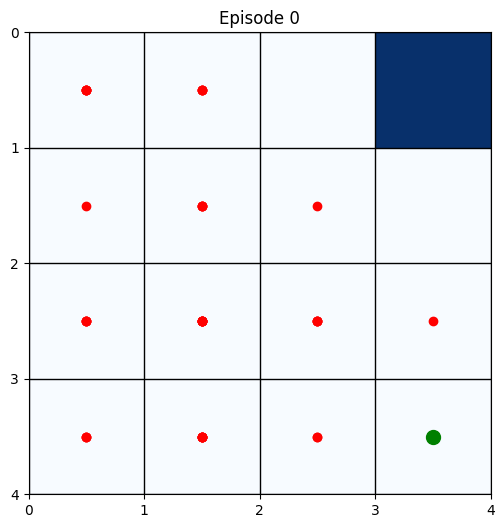

State-values after episode 0:
[[-0.4425533  -0.39729835  0.          0.        ]
 [-0.12803515 -0.38251262 -0.12825126  0.        ]
 [-0.4203283  -0.59233313 -0.37152254  0.1       ]
 [-0.3114361  -0.55087909 -0.231319    0.        ]]


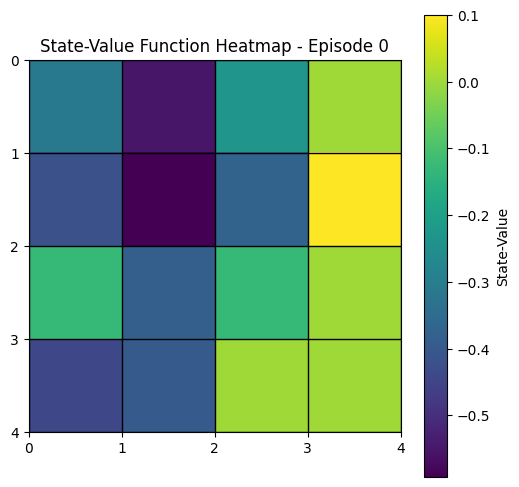

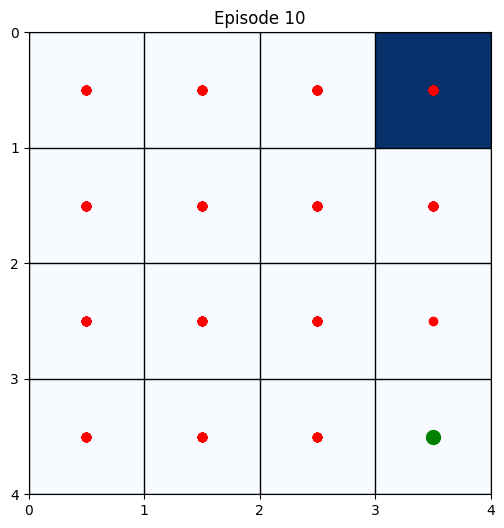

State-values after episode 10:
[[-4.82913689 -4.31102531 -4.29104264 -4.33146627]
 [-4.73592587 -4.46604363 -4.27817437 -3.92524055]
 [-4.36057612 -4.01940799 -3.6381176  -2.03801212]
 [-4.32006717 -3.80996165 -2.26998554  0.        ]]


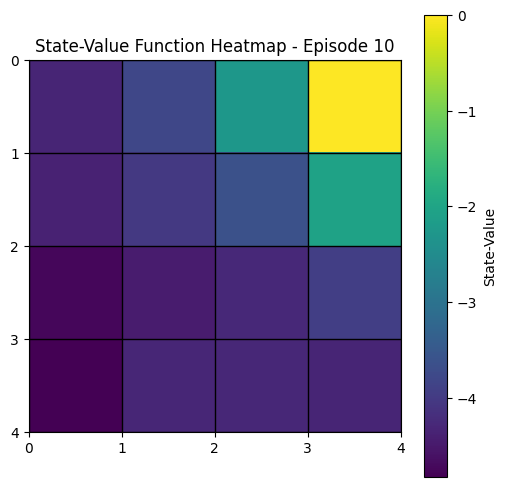

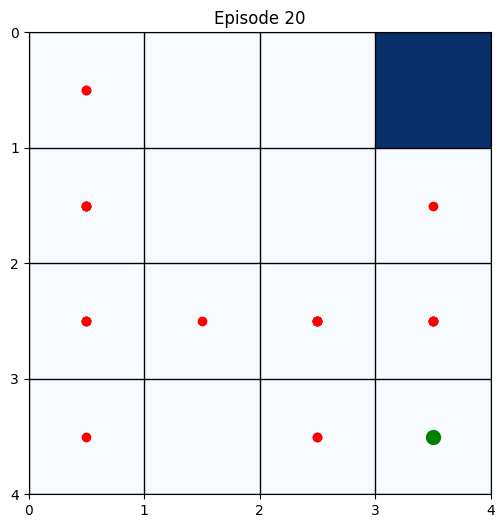

State-values after episode 20:
[[-6.88464243 -6.66162915 -6.47487919 -6.38245346]
 [-6.69230832 -6.26268099 -5.92658857 -5.20751462]
 [-6.28150737 -5.6529471  -4.44767394 -3.58371937]
 [-5.89204651 -5.03076774 -3.47919955  0.        ]]


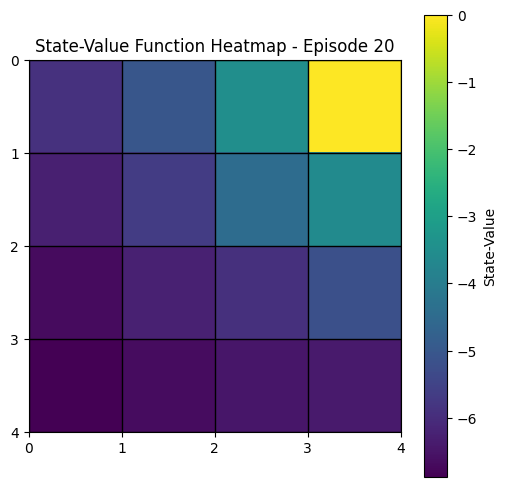

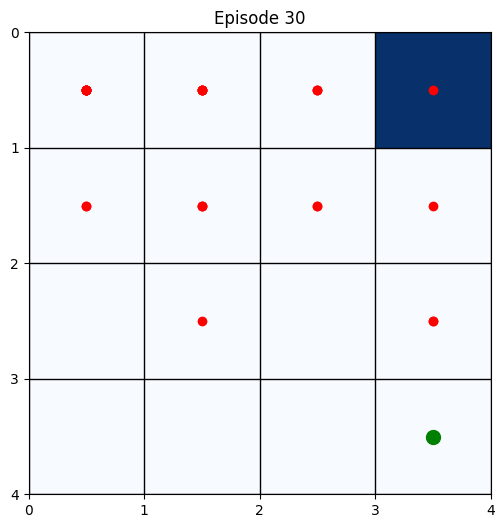

State-values after episode 30:
[[-7.96011197 -7.75152093 -7.37789639 -7.16081247]
 [-7.61243849 -7.08952099 -6.49613235 -5.86481405]
 [-7.10738586 -6.45108992 -5.28081634 -3.72373427]
 [-6.22318678 -5.82853175 -3.48927539  0.        ]]


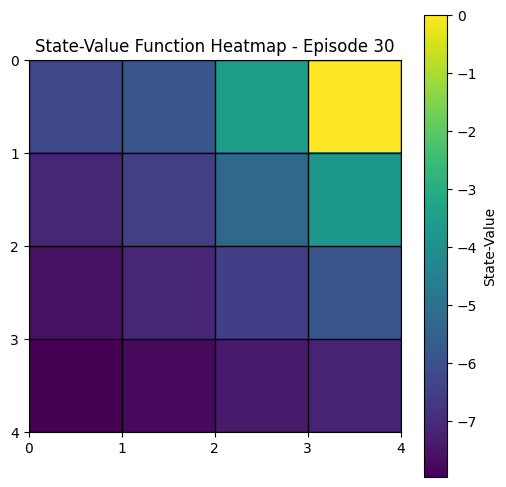

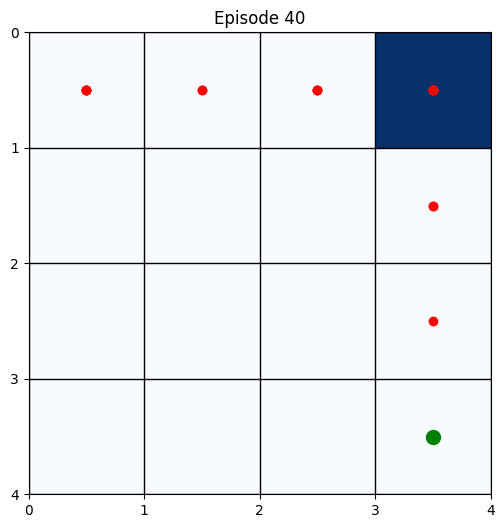

State-values after episode 40:
[[-8.24784938 -8.01187628 -7.83878073 -7.63783618]
 [-7.9623619  -7.67764089 -7.06009503 -6.16994025]
 [-7.35705359 -7.00680454 -5.20436156 -3.13993887]
 [-6.64730133 -5.68328169 -2.59016892  0.        ]]


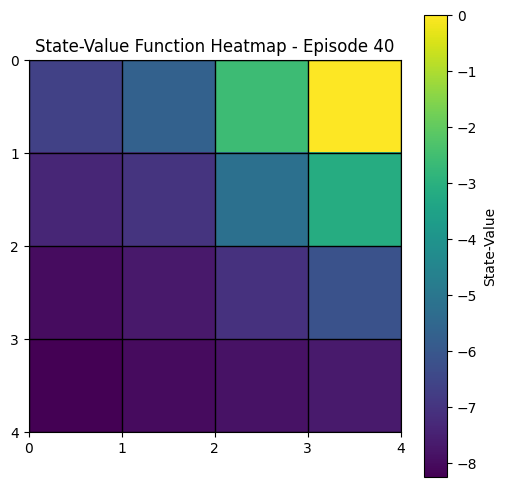

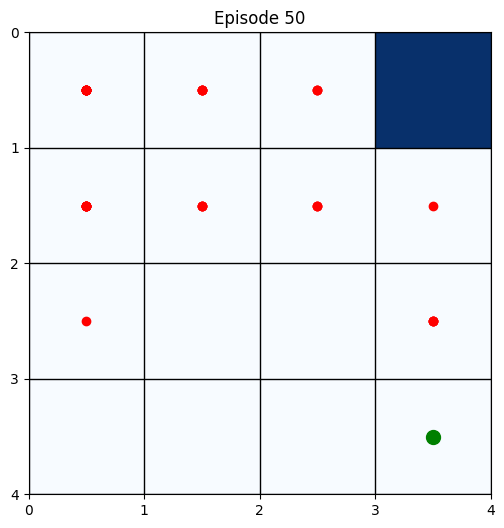

State-values after episode 50:
[[-8.65737607 -8.43793766 -8.12953877 -7.83715484]
 [-8.46724286 -8.15487156 -7.43593936 -6.29011181]
 [-7.98105894 -7.35552698 -6.16269237 -3.39538572]
 [-7.5750236  -5.98495288 -3.90455983  0.        ]]


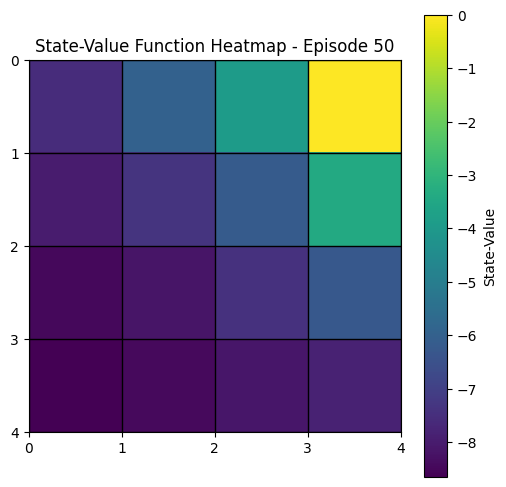

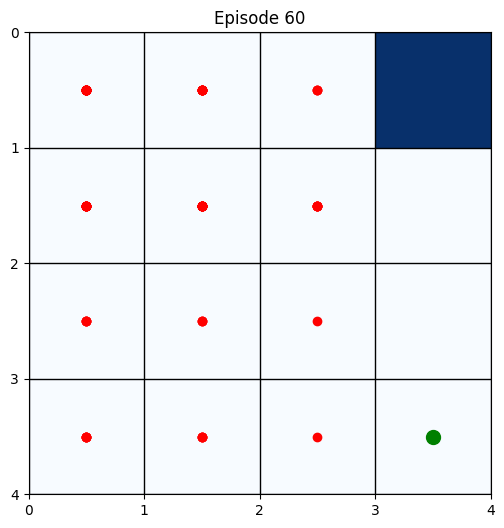

State-values after episode 60:
[[-8.88369665 -8.66940642 -8.44691167 -8.06000103]
 [-8.6838744  -8.55338098 -8.22222846 -7.20309643]
 [-8.08828997 -7.89430576 -6.99109552 -4.01852451]
 [-7.69245384 -6.82357397 -2.73527373  0.        ]]


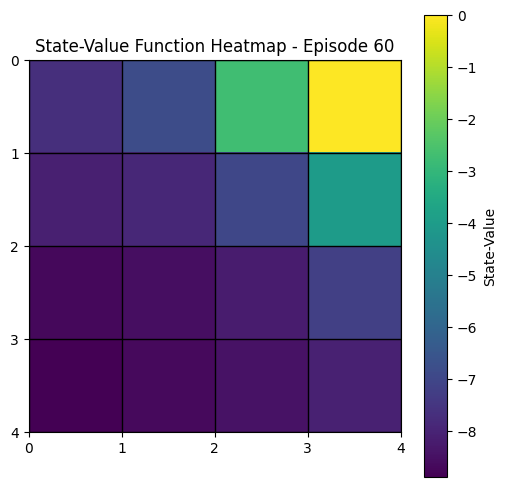

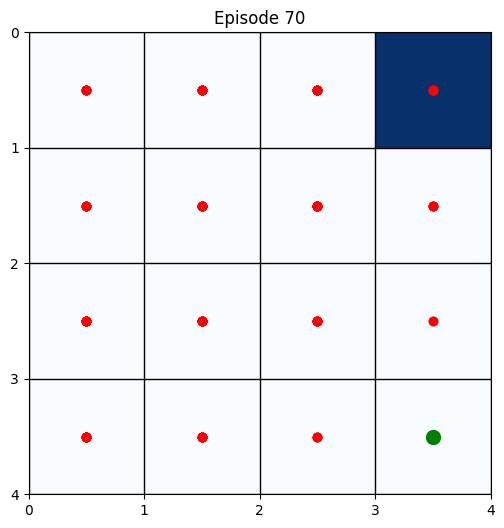

State-values after episode 70:
[[-9.07518533 -8.90999858 -8.64659722 -8.29125017]
 [-8.92396151 -8.56290813 -8.35746867 -7.90460013]
 [-8.48183791 -8.16108908 -7.15998299 -4.44574883]
 [-7.84040924 -6.86450059 -3.66400245  0.        ]]


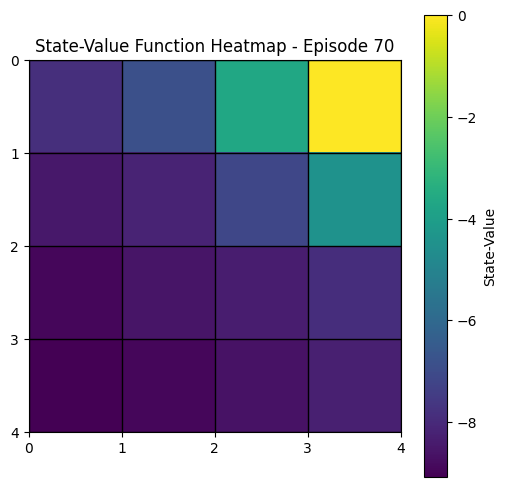

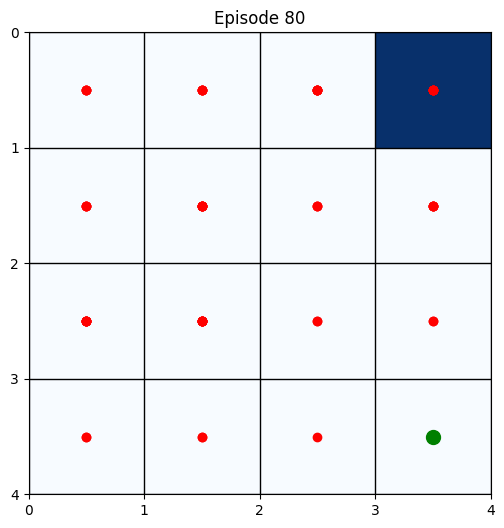

State-values after episode 80:
[[-9.18045222 -9.1107996  -8.95220684 -8.68693858]
 [-8.92533707 -8.816465   -8.27510754 -7.92169357]
 [-8.32631053 -8.29092675 -7.34652307 -4.95856008]
 [-8.05674186 -6.65832815 -3.8025305   0.        ]]


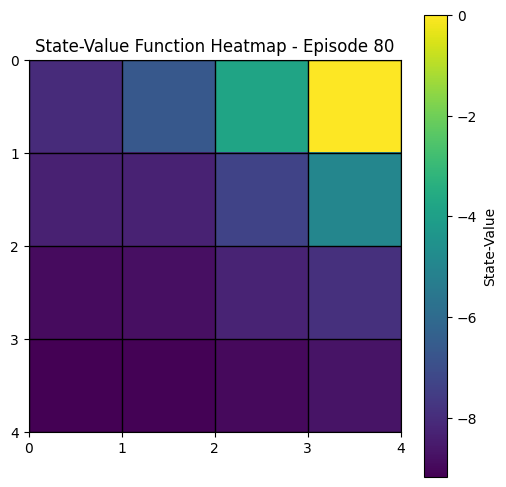

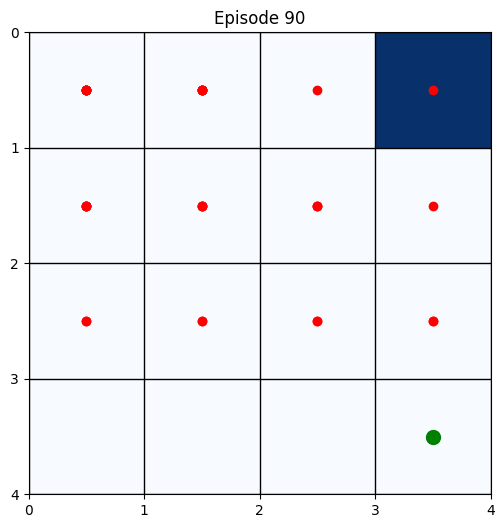

State-values after episode 90:
[[-9.14288345 -9.13821713 -8.91083662 -8.82646427]
 [-8.97721651 -8.62060142 -8.12392219 -7.85179389]
 [-8.48741803 -8.20761272 -6.60803967 -3.8587055 ]
 [-8.23224418 -7.71481101 -4.4372891   0.        ]]


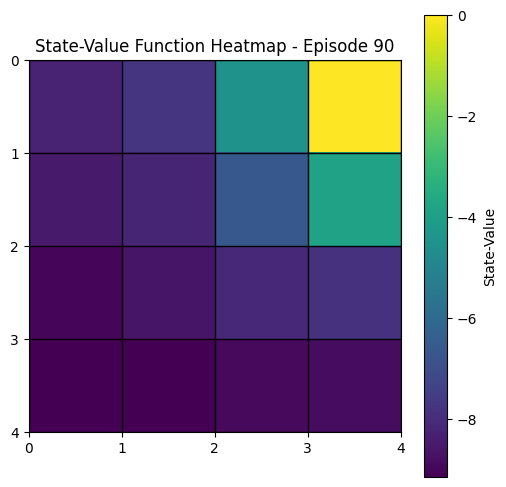

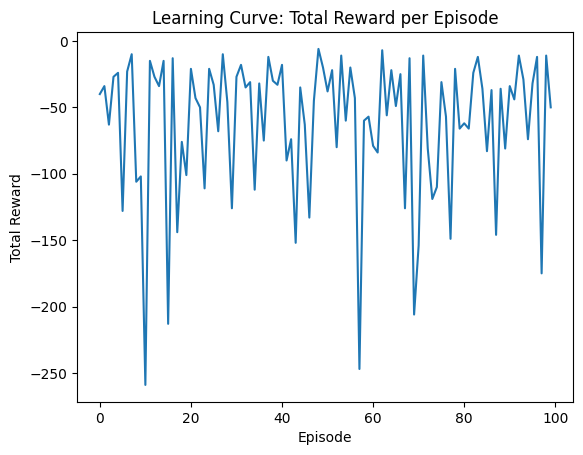

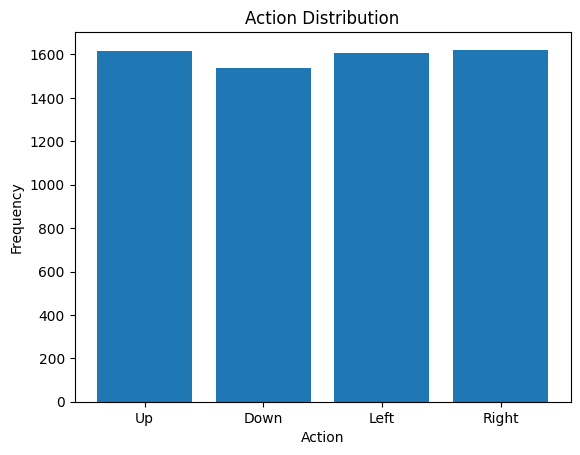

In [25]:
grid_world = GridWorld(size=(4, 4))
agent = Agent(grid_world)

agent.learn(episodes=100)

agent.plot_learning_curve()
agent.plot_action_distribution()

### **Step 5: Final Visualization of the State-Value Function**


After the agent has learned for a while, we can visualize the final state-value function in the grid-world. For this, we'll plot the values of each state as a heatmap.

- plot_value_function(): This function creates a heatmap of the learned state-value function. Each cell’s color represents the value of that state.
- The heatmap allows us to visualize how the agent’s value estimates evolve over time, with warmer colors indicating higher state-values (more desirable states).

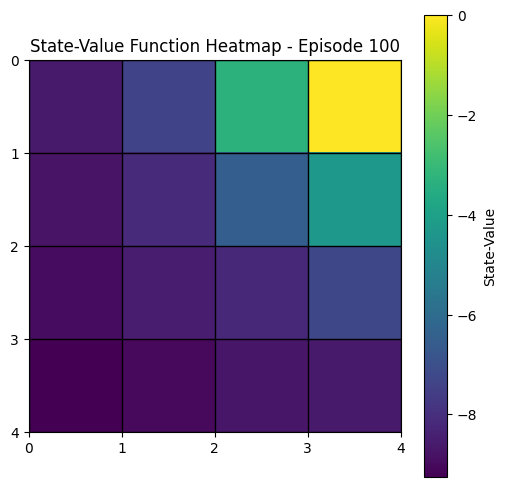

In [26]:
def plot_value_function(V, episode):
    """Plot the state-value function as a heatmap."""
    fig, ax = plt.subplots(figsize=(6, 6))

    cax = ax.imshow(V, cmap='viridis', origin='upper', extent=(0, V.shape[1], 0, V.shape[0]))

    ax.set_xticks(np.arange(0, V.shape[1] + 1, 1))
    ax.set_yticks(np.arange(0, V.shape[0] + 1, 1))
    ax.grid(True, which='both', color='black', linewidth=1)

    plt.gca().invert_yaxis()
    plt.title(f"State-Value Function Heatmap - Episode {episode}")

    plt.colorbar(cax, label="State-Value")

    plt.show()

plot_value_function(agent.V,100)

### **Conclusion**

The output of the state-value function \( V(s) \) of the agent after some episodes of learning in the grid-world environment.

1. **State-Value Function Interpretation**:
   - The state-value function indicates the **expected return** (sum of future rewards) from each state, starting from that state and following the current policy. In this case, the agent uses a **bootstrapping** method (Temporal Difference learning, TD(0)) to update its state-value estimates.
   - The **goal state** (located at (3, 3)) has a value of `0.0`, as it's a terminal state where the agent receives a reward of 1 when it reaches it, but no further rewards are gained after reaching the goal.
   - The **negative values** for the other states reflect the **penalty** the agent incurs for each step it takes while trying to reach the goal. These penalties are due to the agent’s policy of moving around the grid, and the values represent the agent’s belief of how much future reward it will accumulate from those states.

2. **Learning Progress**:
   - As the agent learns over multiple episodes, the state-value function gradually improves, with values closer to the goal state increasing (becoming less negative or approaching zero).
   - The **negative values** show that the agent is still far from its goal in most of the grid, and it is not yet fully optimized in terms of its policy or value function. The agent has not yet learned to preferentially take the most direct path to the goal, but the values are slowly converging as it learns.
   - The agent’s learning process uses **bootstrapping**, where it combines immediate rewards with expected future rewards from neighboring states. This iterative updating refines the value estimates, making the agent’s decisions more informed with each new episode.